In [1]:
#Import library numpy, pandas dan scikit-learn
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
#Membaca Dataset dari File ke Pandas dataFrame
irisDataset = pd.read_csv('Dataset Iris.csv', delimiter=';', header=0)

In [3]:
#Menghapus kolom "Id"
irisDataset.drop(labels='Id', inplace=True, axis=1)
iris = irisDataset

In [4]:
irisDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [5]:
#Mengubah kelas (kolom "Species") dari String ke Unique-Integer
irisDataset["Species"] = pd.factorize(irisDataset.Species)[0]

In [6]:
irisDataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.00,3.02,4.07,1.04,0
1,6.04,3.02,4.05,1.05,0
2,6.09,3.01,4.09,1.05,0
3,5.05,2.03,4.00,1.03,0
4,6.05,2.08,4.06,1.05,0
...,...,...,...,...,...
95,6.07,3.00,5.02,2.03,1
96,6.03,2.05,5.00,1.09,1
97,6.05,3.00,5.02,2.00,1
98,6.02,3.04,5.04,2.03,1


In [7]:
#Mengubah dataFrame ke array Numpy
irisDataset = irisDataset.to_numpy()

In [8]:
#Membagi Dataset => 80 baris data untuk training dan 20 baris data untuk testing
dataTraining = np.concatenate((irisDataset[0:40, :], irisDataset[50:90, :]), 
                              axis=0)
dataTesting = np.concatenate((irisDataset[40:50, :], irisDataset[90:100, :]), 
                             axis=0)


In [9]:
#Memecah Dataset ke Input dan Label
inputTraining = dataTraining[:, 0:4]
inputTesting = dataTesting[:, 0:4]
labelTraining = dataTraining[:, 4]
labelTesting = dataTesting[:, 4]

In [10]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [11]:
#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [12]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Hasil Prediksi :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 20 data
Prediksi Salah : 0 data
Akurasi : 100.0 %


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labelTesting, hasilPrediksi)
print(cm)

[[10  0]
 [ 0 10]]


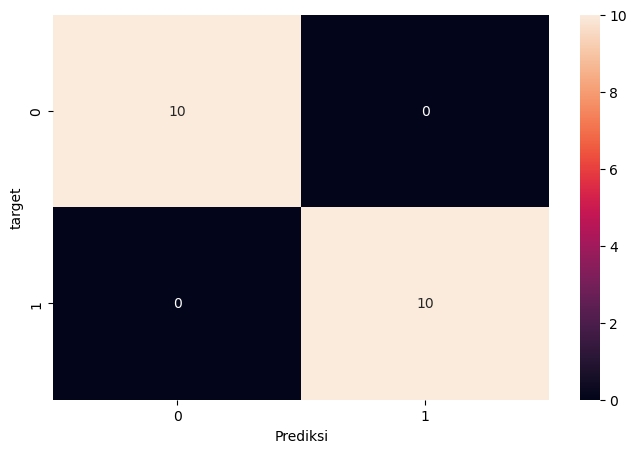

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(labelTesting, hasilPrediksi), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("target")
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(inputTraining, labelTraining)


# Export the trained decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None, 
                           #feature_names=irisDataset.feature_names,  
                           #class_names=irisDataset.target_names,
                           feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                           class_names=['Iris-versicolor','Iris-virginica'],
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Save the decision tree as a PNG image
graph.format = 'png'
graph.render('iris_decision_tree', view=True)


'iris_decision_tree.png'